## Demo: Structure Optimization using Crystalformer

This notebook demonstrates structure optimization using **Crystalformer**.

**Objectives:**
- **Band gap**: Optimize toward 2.5 ± 0.2 eV  
- **Formation energy**: Minimize

**Note:**
- This is a simplified demo.
- Optimization and evaluation are completed in about one minute.

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
from src.main_experiment import main_experiment

/home/afujii/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/afujii/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/afujii/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/afujii/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/home/afujii/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling

In [3]:
result_dir = main_experiment(
    model_name='Crystalformer',  #'Crystalformer' or 'ALIGNN'
    exp_name="test_exp",
    initial_dataset='megnet',
    num_steps=200,
    copy_mutation="copy_mutation___steps_cm-100-150__mutation_noise-0.00007__top_ratio-0.1__group_C_use_rate-0.05__atom_dist_init-True",
    bg_margin_for_train=0.04,  # margin for training
    bg_margin_for_eval=0.2,  # margin for evaluation
    num_candidate=16,  # 1024, # max 4096
    num_batch_crystal=16,  # 1024 # max 4096
    target_bandgap=2.5,  # None: all bandgap test.
    crystal_system=None,  #'perovskite' or None
    perovskite_size=None,  # None or '2x2x2', '3x3x3', '4x4x4'
    limit_coords_displacement=None,  # 0.15 for perovskite, None for non-perovskite
    atom_lr=0.007,
    lattice_lr=0.002,
    coords_lr=0.005,
    bg_loss_mode='band',
    e_form_coef=1.0,
    e_form_criteria=-0.5,
    task="bg_and_eform",
    test_mode=False,
)

'./results/test_exp/history_img.png'

## Optimization History

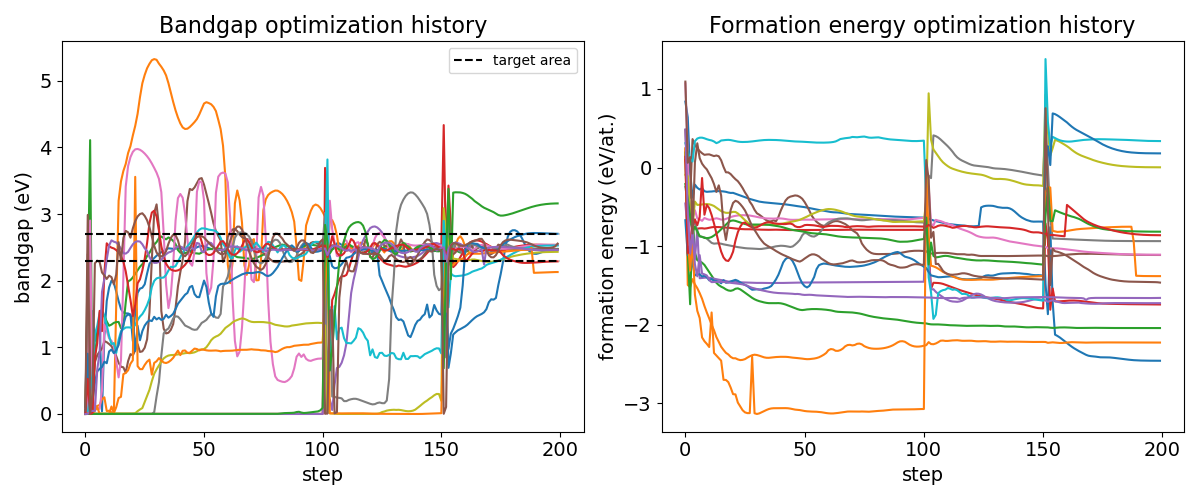

In [4]:
Image.open('./results/test_exp/history_img.png')

## A sample of optimized crystal

In [13]:
from pymatgen.core import Structure

df=pd.read_csv('./results/test_exp/result.csv').head(1)
poscar_path = f"./results/test_exp/poscar/Optimized_based_on_{df['original_fnames'].values[0]}"
structure = Structure.from_file(poscar_path)
display(df[['bandgap_onehot', 'ef_onehot', 'is_neutral_cmn']].rename(columns={'bandgap_onehot': 'Pred. Bandgap', 'ef_onehot': 'Pred. E_form','is_neutral_cmn': 'Neutral?'}))
display(df[['elements_cmn', 'ox_states_cmn']].rename(columns={'elements_cmn': 'Elements', 'ox_states_cmn': 'Oxidation States'}).to_dict())

display(structure)

,Pred. Bandgap,Pred. E_form,Neutral?
0,2.477554,-2.458392,True


{'Elements': {0: "['F', 'F', 'F', 'F', 'F', 'F', 'Li', 'Rb', 'Mo']"},
 'Oxidation States': {0: '[(-1, -1, -1, -1, -1, -1, 1, 1, 4)]'}}

Structure Summary
Lattice
    abc : 7.0915284 6.997927669827639 7.088028629712389
 angles : 59.641915833480375 60.7504201445965 59.528588997504535
 volume : 248.50691237892198
      A : 7.0915284 0.0 0.0
      B : 3.5487077 6.03139 0.0
      C : 3.463316 2.1186557 5.810068
    pbc : True True True
PeriodicSite: F (9.071, 3.277, 4.5) [0.7652, 0.2713, 0.7745]
PeriodicSite: F (6.727, 1.458, 1.209) [0.7625, 0.1686, 0.2081]
PeriodicSite: F (9.432, 5.394, 1.579) [0.7976, 0.7989, 0.2717]
PeriodicSite: F (4.348, 4.868, 0.9199) [0.1597, 0.7516, 0.1583]
PeriodicSite: F (4.65, 2.498, 4.354) [0.2141, 0.151, 0.7494]
PeriodicSite: F (7.43, 6.438, 4.565) [0.2679, 0.7915, 0.7858]
PeriodicSite: Li (3.766, 2.158, 1.554) [0.2684, 0.2638, 0.2675]
PeriodicSite: Rb (10.13, 5.777, 4.184) [0.7244, 0.7049, 0.72]
PeriodicSite: Mo (10.68, 6.058, 0.1344) [0.9966, 0.9963, 0.02313]